In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

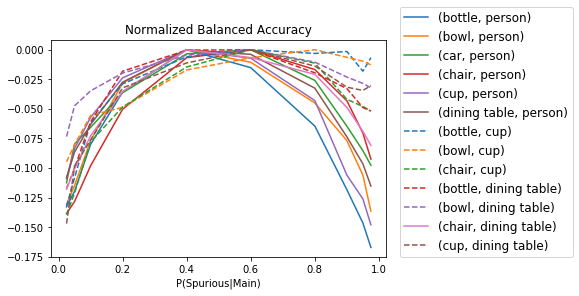

In [2]:

pairs = ['bottle-person', 'bowl-person', 'car-person', 'chair-person', 'cup-person', 'dining+table-person', 'bottle-cup', 'bowl-cup', 'chair-cup', 'bottle-dining+table', 'bowl-dining+table', 'chair-dining+table', 'cup-dining+table']


cut_off = -0.06
count_accepted = 0
count_rejected = 0

for pair in pairs:
    
    with open('./Plots/{}/Results.json'.format(pair), 'r') as f:
        data = json.load(f)
    
    data = data['average']['initial-tune']
    
    p = []
    y = []
    
    for key in data:
        p.append(float(key))
        y.append(np.mean(data[key]))
        
    y = np.array(y)
    y -= np.max(y)

    if y[-1] < cut_off: 
        color = 'C{}'.format(count_accepted)
        linestyle = 'solid'
        count_accepted += 1
    else:
        color = 'C{}'.format(count_rejected)
        linestyle = 'dashed'
        count_rejected += 1
    
    pair = pair.replace('+', ' ')
    main = pair.split('-')[0]
    spurious = pair.split('-')[1]
    label = '({}, {})'.format(main, spurious)
    plt.plot(p, y, label = label, color = color, linestyle = linestyle)

plt.legend(loc = (1.04, 0), fontsize = 12.0)
plt.xlabel('P(Spurious|Main)')
plt.title('Normalized Balanced Accuracy')
plt.show()
plt.close()

In [3]:
def get_avg(pair, mode, p):
    with open('./Plots/{}/Results.json'.format(pair.replace(' ', '-')), 'r') as f:
        data = json.load(f)
    return np.mean(data['average'][mode][p])

def get_both(pair, mode, p):
    with open('./Plots/{}/Results.json'.format(pair.replace(' ', '-')), 'r') as f:
        data = json.load(f)
    return np.mean(data['both'][mode][p])

def get_main(pair, mode, p):
    with open('./Plots/{}/Results.json'.format(pair.replace(' ', '-')), 'r') as f:
        data = json.load(f)
    return np.mean(data['just_main'][mode][p])

def get_spurious(pair, mode, p):
    with open('./Plots/{}/Results.json'.format(pair.replace(' ', '-')), 'r') as f:
        data = json.load(f)
    return np.mean(data['just_spurious'][mode][p])

def get_neither(pair, mode, p):
    with open('./Plots/{}/Results.json'.format(pair.replace(' ', '-')), 'r') as f:
        data = json.load(f)
    return np.mean(data['neither'][mode][p])

def get_rgap(pair, mode, p):
    with open('./Plots/{}/Results.json'.format(pair.replace(' ', '-')), 'r') as f:
        data = json.load(f)
    return np.abs(np.mean(data['both'][mode][p]) - np.mean(data['just_main'][mode][p]))

def get_hgap(pair, mode, p):
    with open('./Plots/{}/Results.json'.format(pair.replace(' ', '-')), 'r') as f:
        data = json.load(f)
    return np.abs(np.mean(data['neither'][mode][p]) - np.mean(data['just_spurious'][mode][p]))

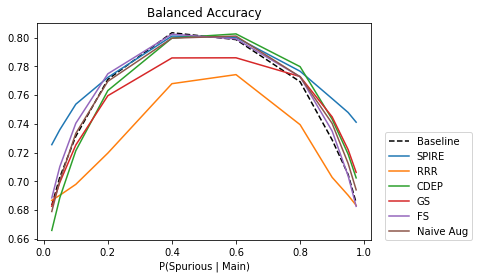

In [4]:
pairs = ['bottle person', 'bowl person', 'car person', 'chair person', 'cup person', 'dining+table person', 'chair dining+table']

name_map = {'initial-tune':'Baseline', 'auto-tune':'SPIRE', 'rrr-tune':'RRR', 'cdep-tt':'CDEP', 'gs-tt':'GS', 'fs-tune':'FS', 'simple-tune': 'Naive Aug'}
trials = [0,1,2,3,4,5,6,7]
p_list = ['0.025', '0.05', '0.1', '0.2', '0.4', '0.6', '0.8', '0.9', '0.95', '0.975']

for mode in name_map:
    
        x_mean = []
        y_mean = []
        x_all = []
        y_all = []
        
        for p in p_list:
            total = 0.0
            count = 0
            
            for pair in pairs:
                try:
                    v = get_avg(pair, mode, p)

                    x_all.append(float(p))
                    y_all.append(v)

                    total += v
                    count += 1
                except:
                    print(mode, p, pair)
                
                
            x_mean.append(float(p))
            y_mean.append(total / count)

        if mode == 'initial-tune':
            plt.plot(x_mean, y_mean, label = name_map[mode], alpha = 1.0, color = 'black', linestyle = 'dashed')
        else:
            plt.plot(x_mean, y_mean, label = name_map[mode], alpha = 1.0)
        #plt.scatter(x_all, y_all, alpha = 0.25)

plt.title('Balanced Accuracy')
plt.xlabel('P(Spurious | Main)')
plt.legend(loc = (1.04, 0))

plt.show()
plt.close()


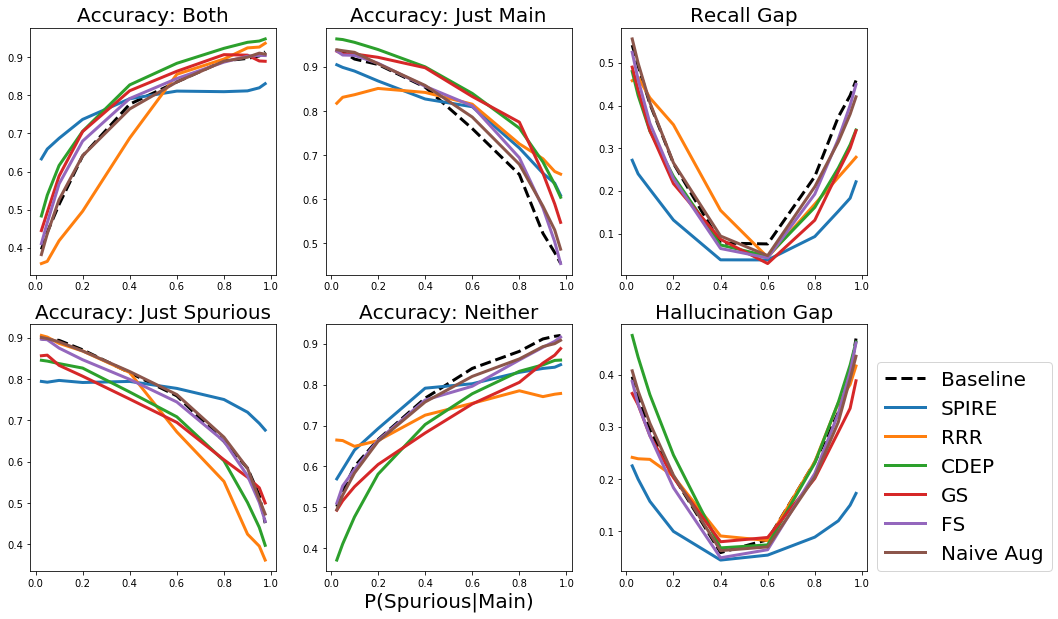

In [5]:
pairs = ['bottle person', 'bowl person', 'car person', 'chair person', 'cup person', 'dining+table person', 'chair dining+table']

name_map = {'initial-tune':'Baseline', 'auto-tune':'SPIRE', 'rrr-tune':'RRR', 'cdep-tt':'CDEP', 'gs-tt':'GS', 'fs-tune':'FS', 'simple-tune':'Naive Aug'}
trials = [0,1,2,3,4,5,6,7]
p_list = ['0.025', '0.05', '0.1', '0.2', '0.4', '0.6', '0.8', '0.9', '0.95', '0.975']



get_map = {'Accuracy: Both': get_both, 
            'Accuracy: Just Main': get_main,
            'Recall Gap': get_rgap,
            'Accuracy: Just Spurious': get_spurious, 
            'Accuracy: Neither': get_neither,
            'Hallucination Gap': get_hgap}

fig = plt.figure(figsize = (15, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

fs = 20.0

ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
#ax.set_ylabel('Difference', labelpad = 20)
ax.set_xlabel('P(Spurious|Main)', fontsize = fs)

for i, key in enumerate(get_map):
    
    get = get_map[key]
    
    ax = fig.add_subplot(2,3,i+1)
    for mode in name_map:

            x_mean = []
            y_mean = []
            x_all = []
            y_all = []

            for p in p_list:
                total = 0.0
                count = 0

                for pair in pairs:
                    try:

                        v = get(pair, mode, p)

                        x_all.append(float(p))
                        y_all.append(v)

                        total += v
                        count += 1
                    except:
                        print(key, mode, p, pair)


                x_mean.append(float(p))
                y_mean.append(total / count)

            if mode == 'initial-tune':
                ax.plot(x_mean, y_mean, label = name_map[mode], alpha = 1.0, linewidth = 3.0, color = 'black', linestyle = 'dashed')
            else:
                ax.plot(x_mean, y_mean, label = name_map[mode], alpha = 1.0, linewidth = 3.0)
            #ax.scatter(x_all, y_all, alpha = 0.25)
        

    ax.set_title(key, fontsize = fs)

plt.legend(loc = (1.04, 0), fontsize = fs)

plt.show()
plt.close()

In [27]:
def get_data(pair, mode, p, split_name, object_name, gce_type):

    if gce_type == 'add':
        with open('./Plots/{}/Search-add.json'.format(pair), 'r') as f:
            data = json.load(f)
        
        metric = '{} and {}+just_{}'.format(split_name, split_name, object_name)
    else:
        if object_name == 'main':
            with open('./Plots/{}/Search-main.json'.format(pair), 'r') as f:
                data = json.load(f)
        else:
            with open('./Plots/{}/Search-spurious.json'.format(pair), 'r') as f:
                data = json.load(f)
                
            
        metric = '{} and {}-{}'.format(split_name, object_name, gce_type)
           
    return np.mean(data[metric][mode][p])
    

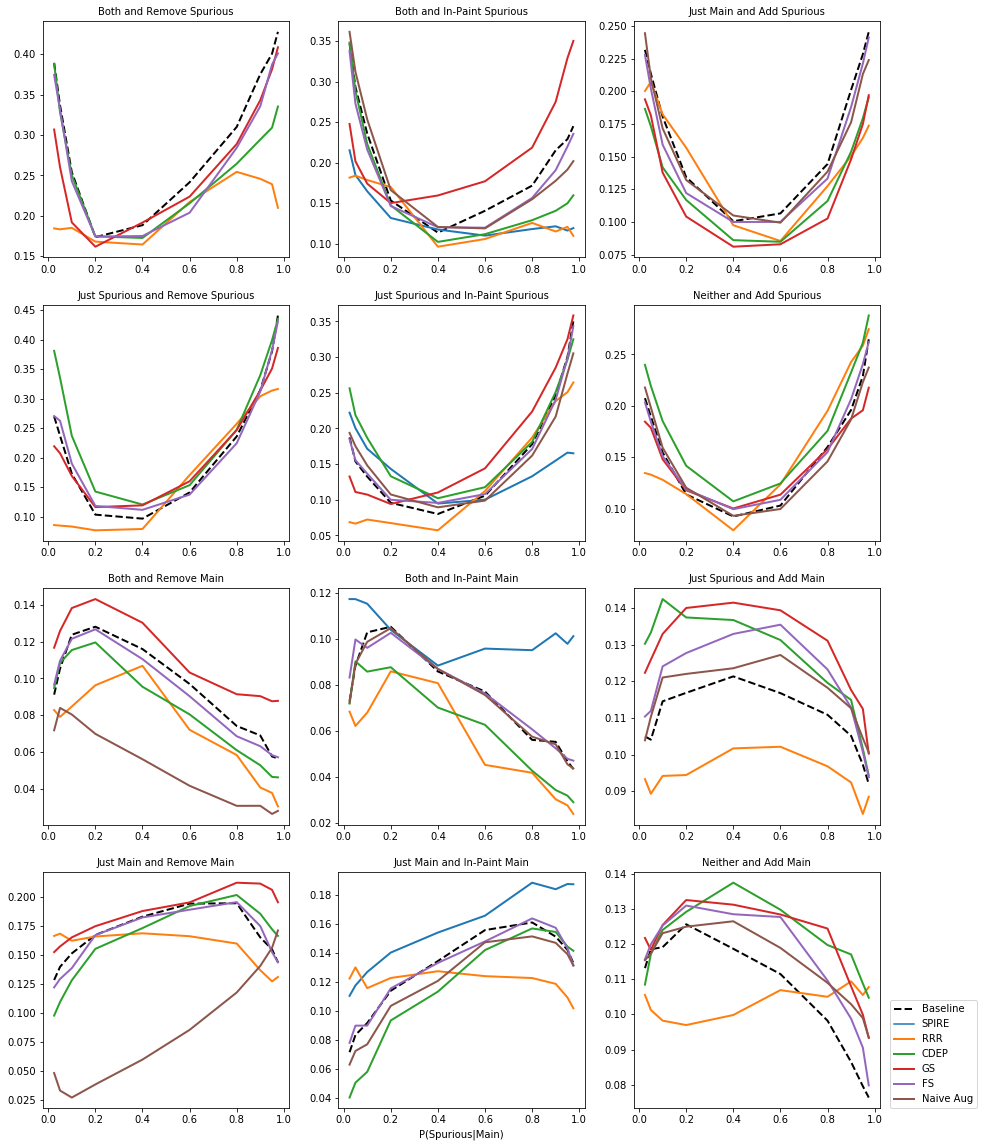

In [43]:
pairs = ['bottle person', 'bowl person', 'car person', 'chair person', 'cup person', 'dining+table person', 'chair dining+table']

name_map = {'initial-tune':'Baseline', 'auto-tune':'SPIRE', 'rrr-tune':'RRR', 'cdep-tt':'CDEP', 'gs-tt':'GS', 'fs-tune':'FS', 'simple-tune':'Naive Aug'}
trials = [0,1,2,3,4,5,6,7]
p_list = ['0.025', '0.05', '0.1', '0.2', '0.4', '0.6', '0.8', '0.9', '0.95', '0.975']

configs = [
            ('both', 'spurious', 'box', 'Both and Remove Spurious'),
            ('both', 'spurious', 'pixel-paint', 'Both and In-Paint Spurious'),
            ('just_main', 'spurious', 'add', 'Just Main and Add Spurious'),
            ('just_spurious', 'spurious', 'box', 'Just Spurious and Remove Spurious'),
            ('just_spurious', 'spurious', 'pixel-paint', 'Just Spurious and In-Paint Spurious'),
            ('neither', 'spurious', 'add', 'Neither and Add Spurious'),
            ('both', 'main', 'box', 'Both and Remove Main'),
            ('both', 'main', 'pixel-paint', 'Both and In-Paint Main'),
            ('just_spurious', 'main', 'add', 'Just Spurious and Add Main'),
            ('just_main', 'main', 'box', 'Just Main and Remove Main'),
            ('just_main', 'main', 'pixel-paint', 'Just Main and In-Paint Main'),
            ('neither', 'main', 'add', 'Neither and Add Main')
            ]

fig = plt.figure(figsize = (15, 20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
                 
fs = 10
lw = 2.0

ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('P(Spurious|Main)', fontsize = fs)

for i, config in enumerate(configs):
    split_name = config[0]
    object_name = config[1]
    gce_type = config[2]
    title = config[3]
                 
    ax = fig.add_subplot(4,3,i+1)
    
    for mode in name_map:
        x_mean = []
        y_mean = []
        x_all = []
        y_all = []

        for p in p_list:
            total = 0.0
            count = 0
            
            for pair in pairs:
                try:
                    v = get_data(pair.replace(' ', '-'), mode, p, split_name, object_name, gce_type)

                    x_all.append(float(p))
                    y_all.append(v)

                    total += v
                    count += 1
                except:
                    print(mode, p, pair) 

            x_mean.append(float(p))
            y_mean.append(total / count)
            
        ax.set_title(title, fontsize = fs)

        # We don't want to compare methods for GCEs they use during training
        if (mode == 'auto-tune' and gce_type in ['box', 'add']) or (mode == 'simple-tune' and object_name == 'spurious' and gce_type == 'box') or (mode == 'gs-tt' and object_name == 'main' and gce_type == 'pixel-paint'):
            ax.plot([], [], label = name_map[mode])
        elif mode == 'initial-tune':
            ax.plot(x_mean, y_mean, label = name_map[mode], alpha = 1.0, linewidth = lw, color = 'black', linestyle = 'dashed')
        else:
            ax.plot(x_mean, y_mean, label = name_map[mode], alpha = 1.0, linewidth = lw)
    
plt.legend(loc = (1.04, 0), fontsize = fs)

plt.show()
plt.close()
